<a href="https://colab.research.google.com/github/Allen001822480/Info7374SpringTeam5/blob/Assignment2/Model_in_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://colab.research.google.com/drive/12b0DfvGAh8W5My7SdwF8hbd8sZpM7cFU

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout,SpatialDropout2D, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt

import os

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs = 50
num_predictions = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
#Using spatial dropout instead.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SpatialDropout2D(0.3))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-4)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

hist2 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=callbacks_list,
          verbose=0)

Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_acc improved from -inf to 0.52040, saving model to weights.best.hdf5

Epoch 00002: val_acc improved from 0.52040 to 0.53500, saving model to weights.best.hdf5

Epoch 00003: val_acc improved from 0.53500 to 0.67200, saving model to weights.best.hdf5

Epoch 00004: val_acc improved from 0.67200 to 0.68280, saving model to weights.best.hdf5

Epoch 00005: val_acc improved from 0.68280 to 0.71980, saving model to weights.best.hdf5

Epoch 00006: val_acc improved from 0.71980 to 0.73590, saving model to weights.best.hdf5

Epoch 00007: val_acc improved from 0.73590 to 0.75340, saving model to weights.best.hdf5

Epoch 00008: val_acc did not improve from 0.75340

Epoch 00009: val_acc improved from 0.75340 to 0.77340, saving model to weights.best.hdf5

Epoch 00010: val_acc improved from 0.77340 to 0.77920, saving model to weights.best.hdf5

Epoch 00011: val_acc improved from 0.77920 to 0.78990, saving model to weights.best.hdf5

Epo

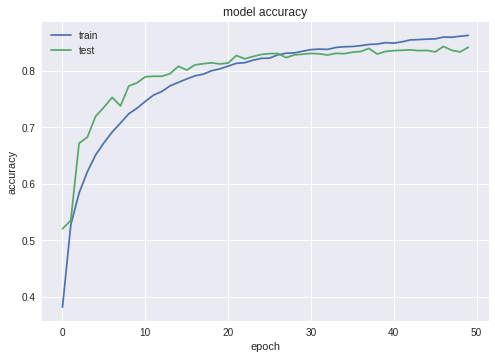

In [0]:
plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

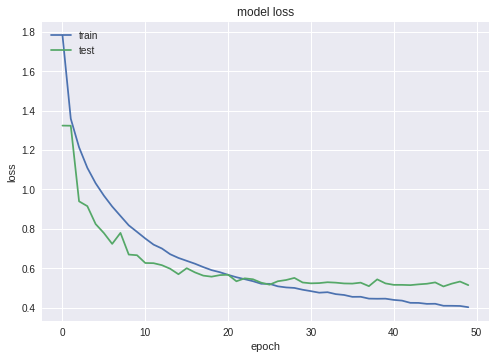

In [0]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 173us/step
Test loss: 0.5143789597988129
Test accuracy: 0.8423
